# <font color='blue'>Técnicas de Reducción de Varianza


En las simulaciones Monte Carlo, como en otras técnicas de muestreo <font color='red'> el error es proporcional a $\frac{1}{\sqrt{N}}$, siendo $N$ el tamaño de la muestra.</font>

Si consideramos la **precisión** como proporcional a la desviación estándar, entonces se sigue que la cantidad de trabajo computacional requerido varía con el cuadrado de la precisión deseada.

Los **métodos de reducción de varianza** buscan reducir esa constante de proporcionalidad para aumentar la precisión sin tener que aumentar el trabajo computacional.

Entre esos métodos, podemos mencionar:

* Variables antitéticas.
* Muestreo Importancia.
* Muestreo estratificado. 
* Variables de control.
* Monte Carlo condicional.

## <font color='blue'> Variables Antitéticas

Consideremos la estimación de la integral:

 <font color='red'> $$\mathcal{I}=\int_0^1 \frac{1}{1+x} dx$$

## Ejercicio:

* Calcular el valor exacto de esta integral.

Podemos estimar el valor de esta integral por el método de la media muestral:

$$\mathcal{I} \approx \frac{1}{1 + u_1} + \frac{1}{1 + u_2} + \frac{1}{1 + u_3} + ... + \frac{1}{1 + u_m}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#Definimos la función de prueba.
def funcion(x):
    return 1.0/(1+x) 

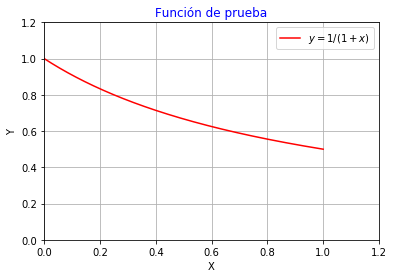

In [139]:
#Graficamos la función de prueba.
X=np.linspace(0,1,1000)
plt.plot(X,funcion(X), color='red', label="$y=1/(1+x)$")
#plt.fill_between(X,funcion(X))
plt.legend()
plt.xlim(0.0, 1.2)
plt.ylim(0.0, 1.2)
plt.grid(True)
plt.title('Función de prueba', color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Podemos estimar el valor de esta integral por el método de la media muestral:

$$\mathcal{I} \approx \frac{1}{1 + u_1} + \frac{1}{1 + u_2} + \frac{1}{1 + u_3} + ... + \frac{1}{1 + u_m}$$

In [4]:
def integ(func=funcion, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=funcion(u)
        suma.append(y)

    return np.mean(suma), np.std(suma)

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.69284
El error estándar es: 0.13754


In [5]:
def integ(func=funcion, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=funcion(1-u)
        suma.append(y)

    return np.mean(suma), np.std(suma), suma

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.69566
El error estándar es: 0.13833


In [143]:
def integ(func=funcion, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=(funcion(u) + funcion(1-u))/2.0
        suma.append(y)

    return np.mean(suma), np.std(suma)

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.69412
El error estándar es: 0.02443


In [16]:
def mc_crudo(funcion, n):
    integral=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        y=(funcion(u) + funcion(1-u))/2.0
        suma.append(y)
        integral.append(np.mean(suma))
        
    print("El valor de la integral es:", round(np.mean(suma),5))
    print("El error estándar es:", round(np.std(suma),5))
    
    return np.mean(suma), np.std(suma), integral

In [40]:
def mc_crudo1(funcion, n):
    integral=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        y=funcion(u)
        suma.append(y)
        integral.append(np.mean(suma))
        
    print("El valor de la integral es:", round(np.mean(suma),5))
    print("El error estándar es:", round(np.std(suma),5))
    
    return np.mean(suma), np.std(suma), integral

El valor de la integral es: 0.69852
El error estándar es: 0.14172
El valor de la integral es: 0.69203
El error estándar es: 0.0238


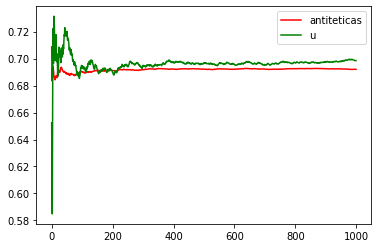

In [48]:
X1=mc_crudo1(funcion, n=1000)[2]
X=mc_crudo(funcion, n=1000)[2]

plt.plot(X, color='red', label='antiteticas')
plt.plot(X1, color='green', label='u')
plt.legend()

In [109]:
(0.13846-0.02413)/0.13846

0.8257258413982378

Supongamos que $\hat{\theta_1}$ es un estimador insesgado del párametro $\theta$ y que además $\hat{\theta_1}$ es una función de $m$ números aleatorios $R_1, ..., R_m$. Debido a que $1 - R_m$ sigue la misma distribución que $R_m$ (ambos $U(0,1)$), podemos construir otro estimador simplemente sustituyendo $R_m$ por $1-R_m$.  